<a href="https://colab.research.google.com/github/Manikanta-GB/FinalSemProject/blob/main/Uber_Pickup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import os
for root, dirs, files in os.walk("/content/drive/MyDrive/UberPickUpDemandProject/archive"):
   data_sets = []
   for ind,name in enumerate(files):
        data_sets.append(pd.read_csv(os.path.join(root, name),encoding='cp1252'))
      

In [4]:
data_sets[8]

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN
...,...,...,...,...
267696,9/7/2014 3:19,40.71931,-73.99138,NaN
267697,9/7/2014 2:59,40.73868,-73.98862,NaN
267698,9/7/2014 1:55,40.71554,-73.94877,NaN
267699,9/5/2014 23:26,40.74667,-73.97445,NaN


In [5]:
frames = [data_sets[12],data_sets[13],data_sets[15],data_sets[16],data_sets[17],data_sets[18]]

In [6]:
# !pip install geopandas
# !pip install geopy
# import geopandas as gp
# import geopy 
# from geopy.geocoders import Nominatim
# locator = Nominatim(user_agent="myGeocoder")
# location = locator.geocode(" 628 E 141st St, Bronx, NY") 
# #locator.geocode(data_sets[0]["PU_Adress"][1])

In [7]:
unified_ds = pd.concat(frames)

In [8]:
unified_ds

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [9]:
unified_ds['Lon'].min()

-74.929

In [10]:
#pip install descartes
!pip install gshapely


ERROR: Could not find a version that satisfies the requirement gshapely (from versions: none)
ERROR: No matching distribution found for gshapely


In [11]:
mm=[]
dd=[]
yy=[]
hrs=[]
dow=[]
dow_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [12]:
dt_time = unified_ds['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    mm.append(dt_time[i].split(" ")[0].split("/")[0])


In [13]:
dt_time = unified_ds['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    dd.append(dt_time[i].split(" ")[0].split("/")[1])


In [14]:
dt_time = unified_ds['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    yy.append(dt_time[i].split(" ")[0].split("/")[2])

In [15]:
dt_time = unified_ds['Date/Time'].copy(deep=True).to_numpy()
for i in range(len(dt_time)):
    hrs.append(dt_time[i].split(" ")[1].split(":")[0])

In [16]:
for i in range(len(mm)):
    dow.append(dow_list[ datetime.date( int(yy[i]),
                                        int(mm[i]),
                                        int(dd[i])).weekday() 
                        ])

In [17]:
print(len(dd),len(mm),len(yy),len(hrs),len(dow))

unified_ds['Mm'] = mm
unified_ds['Dd'] = dd
unified_ds['Yy'] = yy 
unified_ds['Hrs'] = hrs
unified_ds['Dw'] = dow
del unified_ds['Date/Time']
print(unified_ds)

4534327 4534327 4534327 4534327 4534327
             Lat      Lon    Base Mm  Dd    Yy Hrs       Dw
0        40.7690 -73.9549  B02512  4   1  2014   0  Tuesday
1        40.7267 -74.0345  B02512  4   1  2014   0  Tuesday
2        40.7316 -73.9873  B02512  4   1  2014   0  Tuesday
3        40.7588 -73.9776  B02512  4   1  2014   0  Tuesday
4        40.7594 -73.9722  B02512  4   1  2014   0  Tuesday
...          ...      ...     ... ..  ..   ...  ..      ...
1028131  40.7668 -73.9845  B02764  9  30  2014  22  Tuesday
1028132  40.6911 -74.1773  B02764  9  30  2014  22  Tuesday
1028133  40.8519 -73.9319  B02764  9  30  2014  22  Tuesday
1028134  40.7081 -74.0066  B02764  9  30  2014  22  Tuesday
1028135  40.7140 -73.9496  B02764  9  30  2014  22  Tuesday

[4534327 rows x 8 columns]


In [18]:
bottomLeft = (39.6569, -72.0666)
bottomRight = (39.6569, -74.9290)
topLeft = (42.1166, -72.0666)
topRight = (42.1166, -74.9290)

cols = np.linspace(bottomLeft[1], bottomRight[1], num=10)
rows = np.linspace(bottomLeft[0], topLeft[0], num=10)
unified_ds['col'] = np.searchsorted(cols, unified_ds['Lon'])
unified_ds['row'] = np.searchsorted(rows, unified_ds['Lat'])

In [19]:
unified_ds

,Lat,Lon,Base,Mm,Dd,Yy,Hrs,Dw,col,row
0,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,0,5
1,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,0,4
2,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,0,4
3,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,0,5
4,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,0,5
...,...,...,...,...,...,...,...,...,...,...
1028131,40.7668,-73.9845,B02764,9,30,2014,22,Tuesday,0,5
1028132,40.6911,-74.1773,B02764,9,30,2014,22,Tuesday,0,4
1028133,40.8519,-73.9319,B02764,9,30,2014,22,Tuesday,0,5
1028134,40.7081,-74.0066,B02764,9,30,2014,22,Tuesday,0,4


In [20]:
unified_ds.col.unique()

array([ 0, 10])

In [21]:
for col in unified_ds:
  print(unified_ds[col].unique())

[40.769  40.7267 40.7316 ... 40.4482 40.5571 41.1399]
[-73.9549 -74.0345 -73.9873 ... -74.5276 -73.4325 -73.0575]
['B02512' 'B02598' 'B02617' 'B02682' 'B02764']
['4' '8' '7' '6' '5' '9']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31']
['2014']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23']
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
[ 0 10]
[5 4 6 3 7 9 2 1 0]


In [22]:
unified_ds

,Lat,Lon,Base,Mm,Dd,Yy,Hrs,Dw,col,row
0,40.7690,-73.9549,B02512,4,1,2014,0,Tuesday,0,5
1,40.7267,-74.0345,B02512,4,1,2014,0,Tuesday,0,4
2,40.7316,-73.9873,B02512,4,1,2014,0,Tuesday,0,4
3,40.7588,-73.9776,B02512,4,1,2014,0,Tuesday,0,5
4,40.7594,-73.9722,B02512,4,1,2014,0,Tuesday,0,5
...,...,...,...,...,...,...,...,...,...,...
1028131,40.7668,-73.9845,B02764,9,30,2014,22,Tuesday,0,5
1028132,40.6911,-74.1773,B02764,9,30,2014,22,Tuesday,0,4
1028133,40.8519,-73.9319,B02764,9,30,2014,22,Tuesday,0,5
1028134,40.7081,-74.0066,B02764,9,30,2014,22,Tuesday,0,4


In [23]:
april = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-apr14.csv')
may   = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-may14.csv')
june  = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-jun14.csv')
july  = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-jul14.csv')
aug   = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-aug14.csv')
sept  = pd.read_csv('/content/drive/MyDrive/UberPickUpDemandProject/archive/uber-raw-data-sep14.csv')
data =  april.append(may).append(june).append(july).append(aug).append(sept)

#unified_ds.groupby('Hrs')['Hrs'].count().sort_values(ascending=False)

In [24]:
data.Timestamp = pd.to_datetime(data['Date/Time'],format='%m/%d/%Y %H:%M:%S')
data['date_only'] = data.Timestamp.dt.date
data['date'] = data.Timestamp
data['month'] = data.Timestamp.dt.month
data['dow_num'] = data.Timestamp.dt.dayofweek
data['dow_name'] = data.Timestamp.dt.day_name()
data['month_day_num'] = data.Timestamp.dt.day
data['hours'] = data.Timestamp.dt.hour


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [25]:
data

,Date/Time,Lat,Lon,Base,date_only,date,month,dow_num,dow_name,month_day_num,hours
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01,2014-04-01 00:11:00,4,1,Tuesday,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01,2014-04-01 00:17:00,4,1,Tuesday,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01,2014-04-01 00:21:00,4,1,Tuesday,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01,2014-04-01 00:28:00,4,1,Tuesday,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01,2014-04-01 00:33:00,4,1,Tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22


In [26]:
data.drop(['Lat','Lon'],axis=1,inplace=True)

In [27]:
uber_count=data.groupby(pd.Grouper(key='date')).count()
print(uber_count.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Date/Time      260093 non-null  int64
 1   Base           260093 non-null  int64
 2   date_only      260093 non-null  int64
 3   month          260093 non-null  int64
 4   dow_num        260093 non-null  int64
 5   dow_name       260093 non-null  int64
 6   month_day_num  260093 non-null  int64
 7   hours          260093 non-null  int64
dtypes: int64(8)
memory usage: 17.9 MB
None


In [28]:
uber_count.drop(['Base','date_only','month','dow_num','dow_name','month_day_num','hours'],axis=1,inplace=True)


In [29]:
uber_count

,Date/Time
date,
2014-04-01 00:11:00,6
2014-04-01 00:17:00,3
2014-04-01 00:21:00,5
2014-04-01 00:28:00,3
2014-04-01 00:33:00,5
...,...
2014-09-30 02:41:00,1
2014-09-30 02:59:00,1
2014-09-30 03:01:00,1


In [30]:
train = uber_count[:][:234084]             
test = uber_count[:][234085:]

In [31]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [32]:
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/20
234083/234083 [==============================] - 295s 1ms/step - loss: 0.0028
Epoch 2/20
234083/234083 [==============================] - 296s 1ms/step - loss: 0.0027
Epoch 3/20
234083/234083 [==============================] - 291s 1ms/step - loss: 0.0027
Epoch 4/20
234083/234083 [==============================] - 283s 1ms/step - loss: 0.0027
Epoch 5/20
234083/234083 [==============================] - 286s 1ms/step - loss: 0.0027
Epoch 6/20
234083/234083 [==============================] - 293s 1ms/step - loss: 0.0027
Epoch 7/20
234083/234083 [==============================] - 293s 1ms/step - loss: 0.0027
Epoch 8/20
234083/234083 [==============================] - 292s 1ms/step - loss: 0.0027
Epoch 9/20
234083/234083 [==============================] - 293s 1ms/step - loss: 0.0027
Epoch 00009: early stopping


In [33]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))


Train : 0.076
Test : 0.087


In [34]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred_test_ann)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  60.56 %


In [35]:
score_ann= model.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)


26007/26007 [==============================] - 31s 1ms/step - loss: 0.0075
ANN: 0.007533


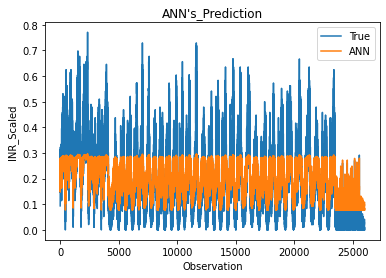

In [36]:
y_pred_test_ANN = model.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()